In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
#print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 

       name     role         type demographic  \
0    buying  Feature  Categorical        None   
1     maint  Feature  Categorical        None   
2     doors  Feature  Categorical        None   
3   persons  Feature  Categorical        None   
4  lug_boot  Feature  Categorical        None   
5    safety  Feature  Categorical        None   
6     class   Target  Categorical        None   

                                         description units missing_values  
0                                       buying price  None             no  
1                           price of the maintenance  None             no  
2                                    number of doors  None             no  
3              capacity in terms of persons to carry  None             no  
4                           the size of luggage boot  None             no  
5                        estimated safety of the car  None             no  
6  evaulation level (unacceptable, acceptable, go...  None             no  

In [15]:
pip install category_encoders

     ---------------------------------------- 81.8/81.8 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import category_encoders as ce
from sklearn import tree
from sklearn.metrics import classification_report


In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1728 non-null   object
dtypes: object(1)
memory usage: 13.6+ KB


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [6]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [37]:
for col in y:
    print(y[col].value_counts())

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1497,low,high,5more,4,med,low
851,high,low,5more,4,med,high
443,high,vhigh,2,4,small,high
1631,low,low,2,4,small,high
1621,low,low,2,2,small,med


Before we conduct the decision tree evaluation, we have to first convert the ordinal data that we have into numerical data since the decision tree classifier cannot accept string data. To do this we use sklearn's ordinal encoder 

In [17]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [79]:
#First we create a decision tree classifier object:
car_eval = DecisionTreeClassifier(random_state=1234)

# Train Decision Tree Classifer
car_eval = car_eval.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = car_eval.predict(X_test)

In [80]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9075144508670521


In [81]:
car_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1234)
car_gini1 = car_gini.fit(X_train, y_train)
y_pred1 = car_gini.predict(X_test)

In [82]:
print("Gini Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Gini Accuracy: 0.8015414258188824


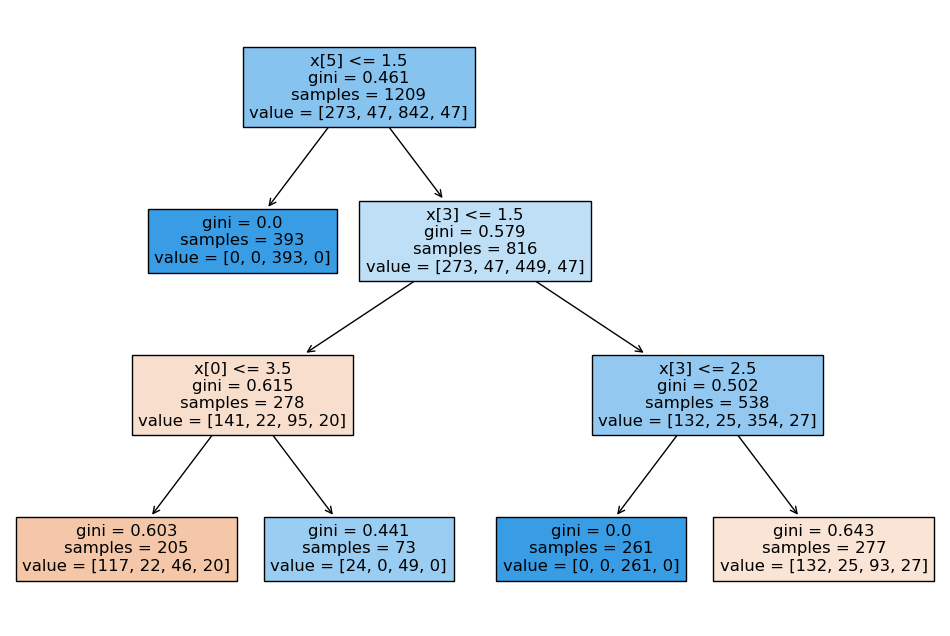

In [69]:
plt.figure(figsize=(12,8))
tree.plot_tree(car_gini1,
               filled=True)
plt.show()

In [67]:
car_ig = DecisionTreeClassifier(criterion="entropy", max_depth=3)
car_ent = car_ig.fit(X_train, y_train)
y_pred2 = car_ent.predict(X_test)

In [68]:
print("Information Gain Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Information Gain Accuracy: 0.7495183044315993


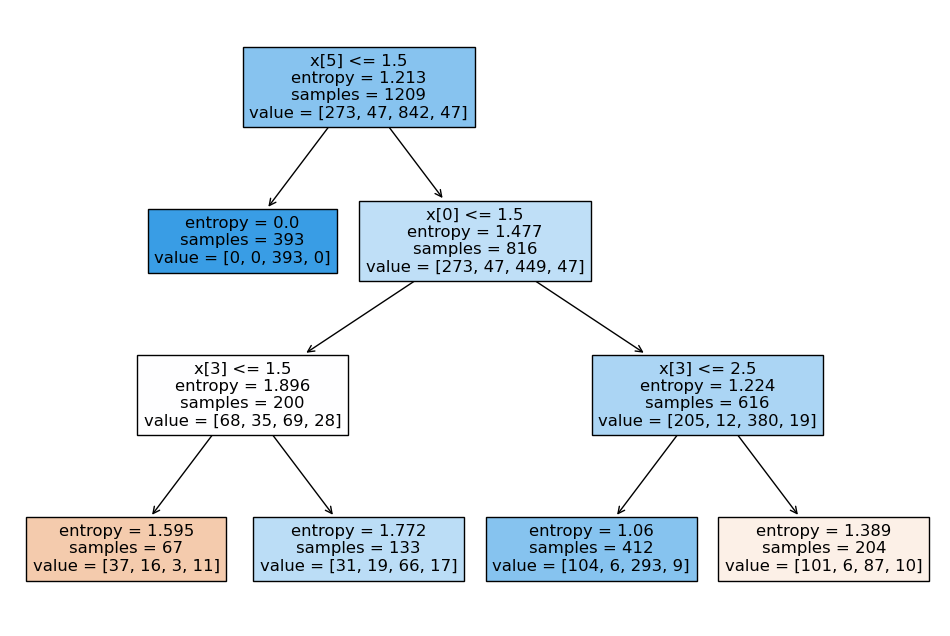

In [70]:
plt.figure(figsize=(12,8))
tree.plot_tree(car_ent,
               filled=True)
plt.show()

In [71]:
#print('classification report of the decision tree:')
#print(classification_report(y_test, y_pred))
print('classification report of decision tree based on gini index')
print(classification_report(y_test, y_pred1))
print('classification report of decision tree based on information gain index')
print(classification_report(y_test, y_pred2))

classification report of decision tree based on gini index
              precision    recall  f1-score   support

         acc       0.52      0.89      0.66       111
        good       0.00      0.00      0.00        22
       unacc       0.96      0.86      0.91       368
       vgood       0.00      0.00      0.00        18

    accuracy                           0.80       519
   macro avg       0.37      0.44      0.39       519
weighted avg       0.79      0.80      0.79       519

classification report of decision tree based on information gain index
              precision    recall  f1-score   support

         acc       0.49      0.50      0.49       111
        good       0.00      0.00      0.00        22
       unacc       0.82      0.91      0.86       368
       vgood       0.00      0.00      0.00        18

    accuracy                           0.75       519
   macro avg       0.33      0.35      0.34       519
weighted avg       0.69      0.75      0.72       519



C:\Users\safam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\safam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\safam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\safam\anaconda3\lib\site-packages\sklearn\metr